<a href="https://colab.research.google.com/github/Itzadityapandey/Emotion_Detection_CNN/blob/main/practical_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Aditya Kumar
Roll No: 2100290130012

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

In [3]:
customer_df = pd.read_csv("/content/Mall_Customers.csv")
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_df.shape

(200, 5)

In [5]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_df.drop(columns=['CustomerID'], inplace=True)

In [7]:
customer_df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

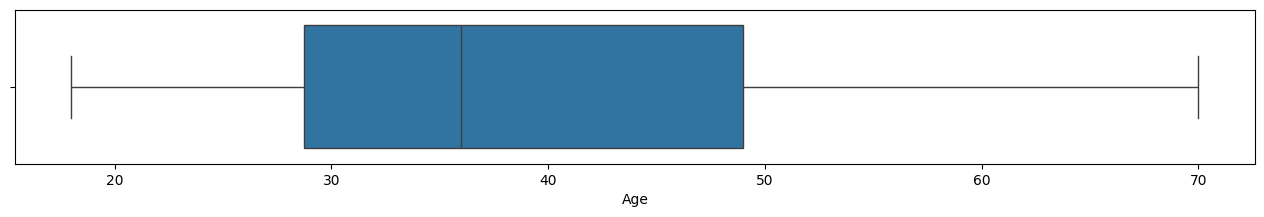

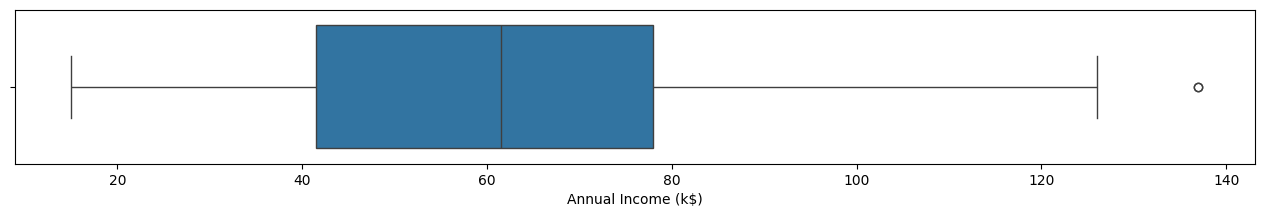

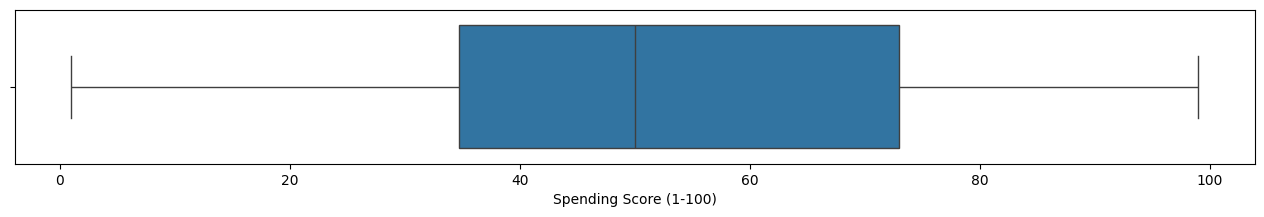

In [8]:
for col in customer_df.describe().columns:
    plt.figure(figsize=(16,2))
    sns.boxplot(data=customer_df, x=col)
    plt.show()

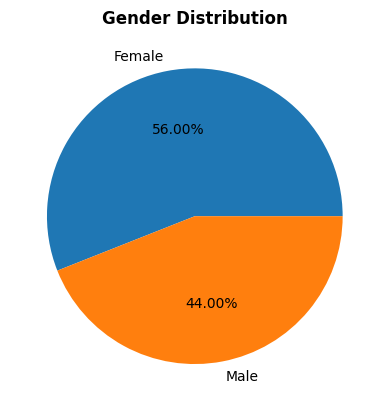

In [10]:
gender_count = customer_df['Gender'].value_counts()
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

<Figure size 640x480 with 0 Axes>

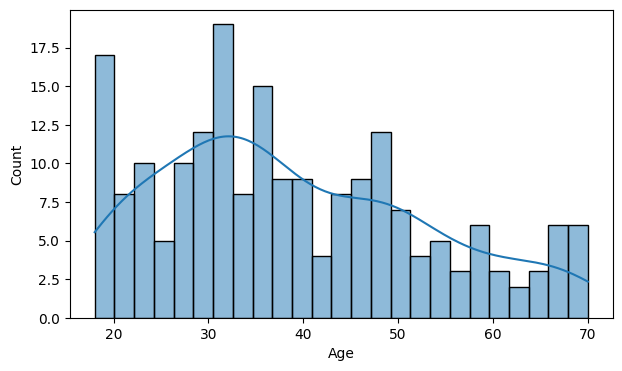

<Figure size 640x480 with 0 Axes>

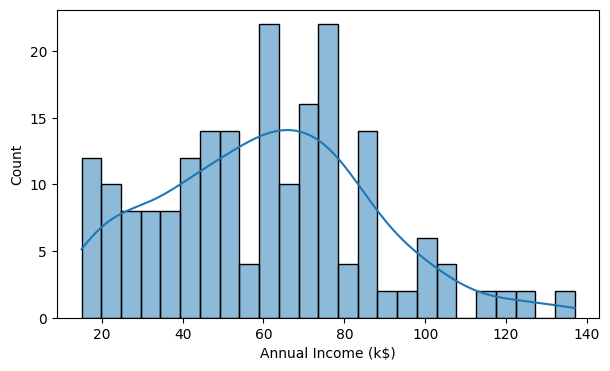

<Figure size 640x480 with 0 Axes>

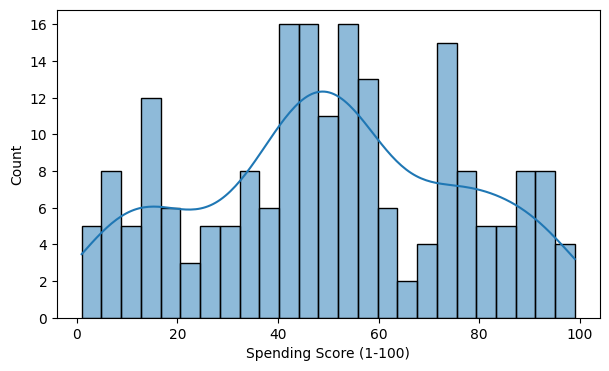

In [11]:
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure()
    set_size_style(7,4)
    sns.histplot(customer_df[col],bins = 25, kde=True)

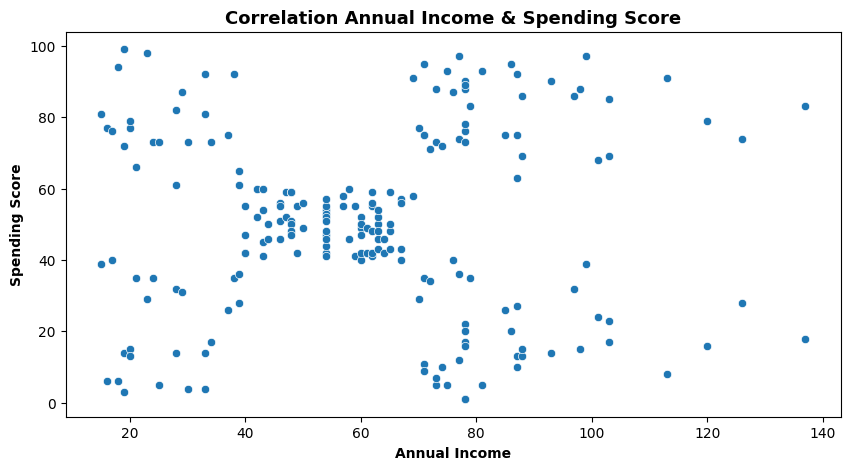

In [12]:
set_size_style(10,5)
ax = sns.scatterplot(data = customer_df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')
customize_plot(ax,'Correlation Annual Income & Spending Score','Annual Income','Spending Score',13,10)

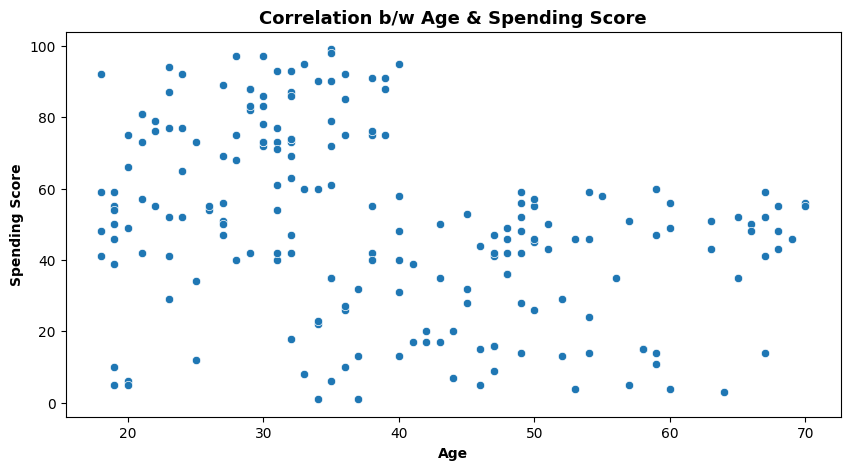

In [13]:
set_size_style(10,5)
ax = sns.scatterplot(data = customer_df, x = 'Age', y = 'Spending Score (1-100)')
customize_plot(ax,'Correlation b/w Age & Spending Score', 'Age', 'Spending Score',13,10)

In [14]:
dummies = pd.get_dummies(customer_df['Gender'],dtype=int)
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [15]:
customer_newdf = pd.concat([customer_df,dummies], axis = 'columns')
customer_newdf

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,0
197,Male,32,126,74,0,1
198,Male,32,137,18,0,1


In [18]:
scaler = StandardScaler()
scaler.fit(customer_newdf)

StandardScaler()

In [19]:
scaled_data = scaler.transform(customer_newdf)
customer_scaled = pd.DataFrame(data = scaled_data, columns = customer_newdf.columns)
customer_scaled
pca = PCA()
pca.fit(customer_scaled)
pca.explained_variance_ratio_

array([4.05210996e-01, 2.61892285e-01, 1.98345591e-01, 1.34551127e-01,
       3.72601294e-33])

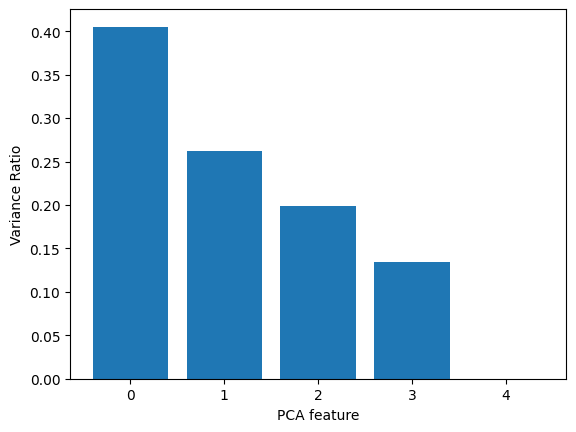

In [20]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Variance Ratio')
plt.xlabel('PCA feature')
plt.show()


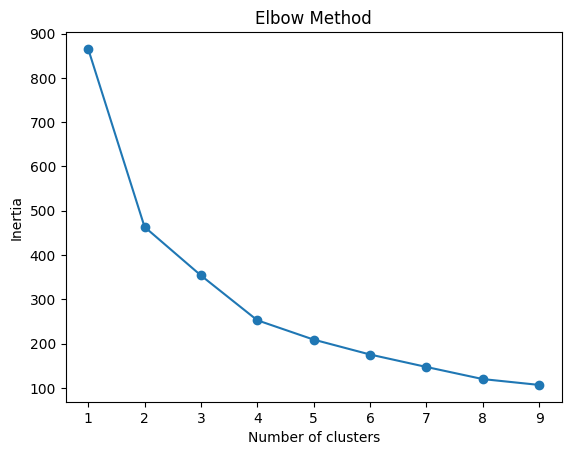

In [21]:
pca = PCA(n_components = 3)
customer_pca = pca.fit_transform(customer_scaled)
customer_pca
inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(customer_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

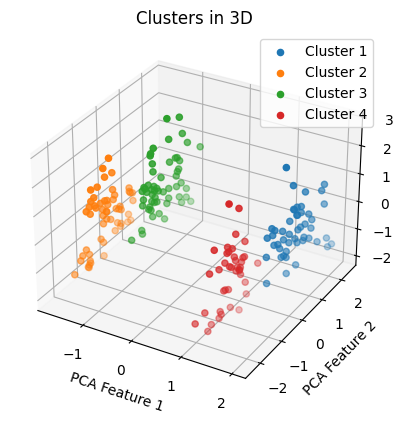

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(customer_pca)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in range(4):
    cluster_points = customer_pca[cluster_labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster + 1}')

ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
ax.set_title('Clusters in 3D')

plt.legend()
plt.show()

In [23]:
customer_df['label'] = kmeans.labels_
customer_df
customer_df.groupby('label').agg({'Age': 'mean',
                                     'Annual Income (k$)': 'mean',
                                     'Spending Score (1-100)': 'mean'})

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,49.437500,62.416667,29.208333
1,28.392857,60.428571,68.178571
2,47.803571,58.071429,34.875000
3,28.250000,62.000000,71.675000
